<a href="https://colab.research.google.com/github/jmgang/SpoTwoFy-project-notebooks/blob/main/notebooks/5c_SpoTwoFy_Create_Recommender_Engine_SemanticML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Recommender Engine

*What is a recommender engine?*

A recommender engine is an information filtering system that predicts a user's preferences for a set of items (such as products, movies, or music) based on their previous interactions with those items or similar items, and provides personalized recommendations for new items.

This recommender engine takes in a *seed track* and outputs track recommendations based on *similarity measures*

In [28]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

In [29]:
# # Mount GDrive folders
# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
# # Set home directory
# import os
# home_dir = "/content/drive/MyDrive/Colab Notebooks/Sprint 3/"
# os.chdir(home_dir)

## 1. Read the recommendation pool

In [31]:
# # read data
rec_pool_df = pd.read_csv("https://raw.githubusercontent.com/jmgang/SpoTwoFy-project-notebooks/main/data/recommender/spotify_tracks_hale_sentiment_ml_rec_pool.csv")
rec_pool_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,num_artists,duration_mins,album_name,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_chill_opm_proba,genre_happy_opm_proba,genre_hugot_opm_proba,genre_sad_opm_proba
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,NaN,NaN,NaN,3,sad_opm,0.581844,0.256209,0.081410,0.080538,0.581844
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,NaN,NaN,NaN,0,chill_opm,0.511473,0.511473,0.098242,0.112713,0.277572
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,NaN,NaN,NaN,0,chill_opm,0.591319,0.591319,0.092221,0.057893,0.258566
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,NaN,NaN,NaN,0,chill_opm,0.664087,0.664087,0.087271,0.081570,0.167071
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,NaN,NaN,NaN,3,sad_opm,0.668071,0.230195,0.018058,0.083676,0.668071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8342,5aoHDyhJrLYHkAxmR9Tuw9,One Of These Days,NaN,NaN,7ipnlz8tLUzVBJeeZeiz2v,NaN,2015-03-23,5,0.506,0.470,...,NaN,NaN,Time & Space,0,chill_opm,0.434266,0.434266,0.050652,0.149634,0.365449
8343,1tgAF6zLIOBksB0dmpVM9O,Plasticine,NaN,NaN,7ipnlz8tLUzVBJeeZeiz2v,NaN,2015-03-23,20,0.400,0.269,...,NaN,NaN,Time & Space,3,sad_opm,0.592147,0.239669,0.037849,0.130335,0.592147
8344,6RXbOOGqxPMr99pEbaJjOC,Home,NaN,NaN,7ipnlz8tLUzVBJeeZeiz2v,NaN,2015-03-23,22,0.586,0.601,...,NaN,NaN,Time & Space,0,chill_opm,0.725379,0.725379,0.054550,0.059330,0.160741
8345,6CHpr3pY2MbJ5y1076UDnI,The Day You Said Goodnight - Acoustic Version,NaN,NaN,5www5PCOdkBpuNCanxeo6L,NaN,2006-02-26,55,0.424,0.221,...,NaN,NaN,The Day You Said Goodnight (Acoustic Version),3,sad_opm,0.894793,0.047080,0.017778,0.040348,0.894793


In [32]:
rec_pool_df.shape

(8347, 33)

## 2. Input Seed Track


The **seed track** is the track that will serve as input to the recommender engine. The recommender engine will attempt to generate recommendations from the pool based on their similarity to the seed track.

>Q: Pick a track of choice and use this as seed track

In [33]:
seed_track_data = rec_pool_df[rec_pool_df['track_name']=="The Day You Said Goodnight"].iloc[0]
seed_track_data#[feature_cols]

track_id                     0HZ3OUVrGHxttD2EuHqRm3
track_name               The Day You Said Goodnight
artist_id                    6Ww3OMFzCaO33ulKh1LBFN
artist_name                                    Hale
album_id                     472GgeFZaCdRLcL3cT0IAn
duration                                   291357.0
release_date                                   2005
popularity                                       70
danceability                                  0.558
energy                                        0.553
key                                             4.0
loudness                                     -6.669
mode                                            1.0
speechiness                                  0.0323
acousticness                                  0.492
instrumentalness                                0.0
liveness                                      0.116
valence                                       0.251
tempo                                       134.263
playlist_id 

In [34]:
hale_songs_df = pd.read_csv('https://raw.githubusercontent.com/jmgang/SpoTwoFy-project-notebooks/main/data/hale/hale_songs.csv')
hale_songs_df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_name,album_id,album_name,popularity,release_date
0,4S1DcySs2qHEggSlceBmvl,0.580,0.664,9,-6.541,1,0.0316,0.42400,0.323000,0.1280,0.195,132.259,236600,Take No,3rYydzqOp83YUYh4EXjrbk,Hale,32,2005
1,40b9yd2XrcYXuJkoW9bHIr,0.312,0.514,7,-7.213,1,0.0332,0.09910,0.000169,0.1120,0.233,140.853,296547,Broken Sonnet,3rYydzqOp83YUYh4EXjrbk,Hale,53,2005
2,5KFFqtixyLrREHz3iiU9jw,0.588,0.490,4,-6.401,1,0.0344,0.30400,0.025000,0.0720,0.331,75.155,286960,Blue Sky,3rYydzqOp83YUYh4EXjrbk,Hale,68,2005
3,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.51100,0.000000,0.1190,0.238,134.259,291320,The Day You Said Goodnight,3rYydzqOp83YUYh4EXjrbk,Hale,73,2005
4,4fnBf4JSGxnVw3cPED47Xt,0.644,0.626,2,-5.633,1,0.0372,0.22400,0.000237,0.2190,0.155,118.440,286947,Wishing,3rYydzqOp83YUYh4EXjrbk,Hale,30,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1tgAF6zLIOBksB0dmpVM9O,0.400,0.269,6,-11.763,1,0.0290,0.83800,0.000053,0.0859,0.282,146.699,242534,Plasticine,7ipnlz8tLUzVBJeeZeiz2v,Time & Space,20,2015-03-23
79,6RXbOOGqxPMr99pEbaJjOC,0.586,0.601,7,-9.111,1,0.0493,0.38900,0.002840,0.0881,0.519,126.997,228526,Home,7ipnlz8tLUzVBJeeZeiz2v,Time & Space,22,2015-03-23
80,6CHpr3pY2MbJ5y1076UDnI,0.424,0.221,4,-9.279,1,0.0351,0.88200,0.000000,0.1340,0.299,125.964,328533,The Day You Said Goodnight - Acoustic Version,5www5PCOdkBpuNCanxeo6L,The Day You Said Goodnight (Acoustic Version),55,2006-02-26
81,13XyijaeNt2iThYc36UJXC,0.616,0.853,11,-8.607,1,0.0438,0.00009,0.698000,0.0212,0.956,130.011,488829,The Day You Said Goodnight (Leon Chaplain Mass...,12R5dPogCQrWOamitULYVA,The Day You Said Goodnight (Leon Chaplain Mass...,5,2006-07-29


## 3. Explore Similarity Measures

We will use 3 similarity measures for our recommender engine. These are usually expressed as a distance metric. The smaller these quantities are, the closer the two points are.

**Euclidean distance**- It is the straight-line distance between two points in Euclidean space. In other words, it is the length of the shortest path between two points in a straight line. It is calculated as the square root of the sum of the squared differences between each corresponding dimension of the two points.

**Manhattan distance**- It is also known as taxicab distance or L1 distance. It measures the distance between two points by summing the absolute differences between each corresponding dimension of the two points. It represents the distance between two points as if a person were walking on the streets of Manhattan, where the shortest path between two points is always a right-angled path.

**Cosine distance**- It measures the cosine of the angle between two vectors in a high-dimensional space. It calculates the similarity between two vectors rather than the distance. It is often used to compare the similarity between text documents or to determine the similarity between two images.

In [35]:
# Audio feature cols
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
# Genre probability cols
genre_proba_cols = [col for col in rec_pool_df.columns if col.startswith('genre_')]

Compute distances

In [36]:
def get_distances(x,y):
    euclidean_dist =  euclidean_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    manhattan_dist =  manhattan_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    cosine_dist = 1 - cosine_similarity(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    return [euclidean_dist,manhattan_dist,cosine_dist]

In [37]:
rec_pool_df['all_distances_features'] = rec_pool_df.apply(lambda x: get_distances(x[feature_cols],\
                                                                           seed_track_data[feature_cols]), axis=1)

In [38]:
dist_feature_cols = ['euclidean_dist_features','manhattan_dist_features', 'cosine_dist_features']
rec_pool_df[dist_feature_cols] = rec_pool_df['all_distances_features'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre,predicted_genre_proba,genre_chill_opm_proba,genre_happy_opm_proba,genre_hugot_opm_proba,genre_sad_opm_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,sad_opm,0.581844,0.256209,0.081410,0.080538,0.581844,"[15.881662657291368, 22.250600000000002, 0.001...",15.881663,22.250600,0.001785
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,chill_opm,0.511473,0.511473,0.098242,0.112713,0.277572,"[22.978906659151583, 24.26549999999999, 4.1624...",22.978907,24.265500,0.000004
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,chill_opm,0.591319,0.591319,0.092221,0.057893,0.258566,"[5.788866840755715, 7.433200000000003, 1.44188...",5.788867,7.433200,0.000014
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,chill_opm,0.664087,0.664087,0.087271,0.081570,0.167071,"[46.744465721195326, 53.65460201999999, 0.0051...",46.744466,53.654602,0.005182
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,sad_opm,0.668071,0.230195,0.018058,0.083676,0.668071,"[3.298131290595096, 5.253099999999986, 0.00018...",3.298131,5.253100,0.000184


View histograms of the 3 similarity measures

array([[<Axes: title={'center': 'euclidean_dist_features'}>,
        <Axes: title={'center': 'manhattan_dist_features'}>],
       [<Axes: title={'center': 'cosine_dist_features'}>, <Axes: >]],
      dtype=object)

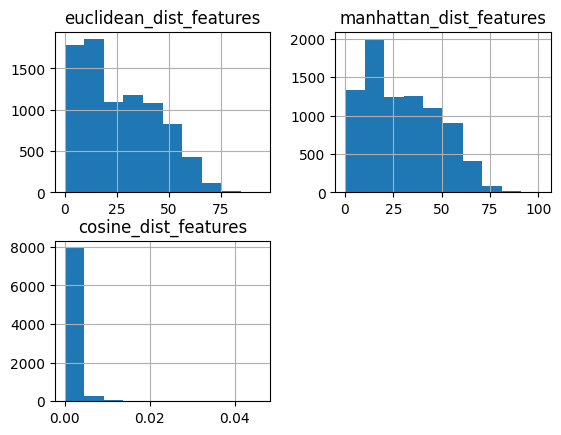

In [39]:
rec_pool_df[dist_feature_cols].hist()

## 4. Build engine and generate recommendations

 - We will output recommended tracks based on the seed track using the following recommender engine builds

    - Build 1. Audio features only
    - Build 2. Audio features and with same predicted genre
    - Build 3. Predicted genre probabilities only
    - Build 4. Audio features and predicted genre probabilities

##### 4.1. Build 1 - Use audio features only
4.1.1. Euclidean distance

In [40]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[(rec_pool_df['track_id']!=seed_track_data['track_id']) & (~rec_pool_df['track_id'].isin(hale_songs_df.track_id.unique()))].sort_values('euclidean_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','euclidean_dist_features','predicted_genre']]

,track_id,track_name,artist_name,euclidean_dist_features,predicted_genre
3428,3daOwyqLApvUJCYQCjdRw8,Sana Dalawa Ang Puso Ko,RICO J PUNO,0.355800,chill_opm
523,1NAo79LoI2KhBg3dPMXco3,You Are My Everything - From 'Descendants of t...,Julie Anne San Jose,0.376903,sad_opm
4993,6uU67m780vpFC4PGFOTXEn,It's Over Now,Kyla,0.472478,chill_opm
4250,6dKMtW4o2Bbl7n9qOmDX9o,'Di Ba't Pasko'y Pag-ibig,"['ABS-CBN Music All Star', 'Carol Banawa']",0.481349,chill_opm
4536,4VMkcaO6RaclmGFRW2hfww,Mahal Na Mahal Kita,Aegis,0.496189,chill_opm
4997,1rYRd1d2LnYopazs9HyXWD,Let the Love Begin,"['Jerome John Hughes', 'Kyla']",0.548324,sad_opm
7323,46wDG6evLn2iPoQ0F8CUWk,My sea,IU,0.565537,chill_opm
224,2EqdBPn7IFykmJ3Eh7PlKw,Pilit,Hilera,0.570669,chill_opm
4826,1skKlLOmO8P31LbEB4PcDU,Pasko Sa Pinas,Yeng Constantino / Star Magic All Star,0.643836,chill_opm
6380,0PG9fbaaHFHfre2gUVo7AN,Please Me,Cardi B,0.675926,chill_opm


4.1.2. Manhattan distance

In [41]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[(rec_pool_df['track_id']!=seed_track_data['track_id']) & (~rec_pool_df['track_id'].isin(hale_songs_df.track_id.unique()))].sort_values('manhattan_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','manhattan_dist_features','predicted_genre']]

,track_id,track_name,artist_name,manhattan_dist_features,predicted_genre
523,1NAo79LoI2KhBg3dPMXco3,You Are My Everything - From 'Descendants of t...,Julie Anne San Jose,0.812003,sad_opm
3428,3daOwyqLApvUJCYQCjdRw8,Sana Dalawa Ang Puso Ko,RICO J PUNO,0.866402,chill_opm
4250,6dKMtW4o2Bbl7n9qOmDX9o,'Di Ba't Pasko'y Pag-ibig,"['ABS-CBN Music All Star', 'Carol Banawa']",0.882900,chill_opm
4993,6uU67m780vpFC4PGFOTXEn,It's Over Now,Kyla,0.951298,chill_opm
4997,1rYRd1d2LnYopazs9HyXWD,Let the Love Begin,"['Jerome John Hughes', 'Kyla']",0.997400,sad_opm
4536,4VMkcaO6RaclmGFRW2hfww,Mahal Na Mahal Kita,Aegis,1.068100,chill_opm
224,2EqdBPn7IFykmJ3Eh7PlKw,Pilit,Hilera,1.258482,chill_opm
7323,46wDG6evLn2iPoQ0F8CUWk,My sea,IU,1.310800,chill_opm
1106,7zedIdswcnY9eW6e4wImEs,Let the Pain Remain,Side A,1.335200,hugot_opm
2913,7zedIdswcnY9eW6e4wImEs,Let the Pain Remain,"['Side A', 'Jun Reyes']",1.335200,hugot_opm


4.1.3. Cosine distance

In [42]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[(rec_pool_df['track_id']!=seed_track_data['track_id']) & (~rec_pool_df['track_id'].isin(hale_songs_df.track_id.unique()))].sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
2088,5XPsSVX2R3enPamRURMq3W,ANXIOUS HEART,geiko,2.777656e-07,chill_opm
5556,3gkwEytdCYIsrFdfEE2ALW,Mahika,TJ Monterde,6.070774e-07,chill_opm
2179,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,6.797643e-07,chill_opm
8185,2GAhgAjOhEmItWLfgisyOn,Low,SZA,7.028132e-07,chill_opm
1451,2Seb4aijY1t46OorUZdsGE,Sampaguita,"['juan karlos', 'Gloc-9']",7.678729e-07,chill_opm
2833,5pp9zZxgRAKHX2IZcjolxQ,Wag Mong Aminin,Ebe Dancel,8.073189e-07,chill_opm
3959,5nDSJO4909uNzMcZH3CggS,Hard to Say I'm Sorry - 2009 Remaster,Chicago,1.541070e-06,sad_opm
430,6BxJLJw228OY5BFerPGl7z,Dahan,December Avenue,1.633774e-06,sad_opm
6191,2hnxrRNzF74mdDzpQZQukQ,There's No Way (feat. Julia Michaels),Lauv,1.677042e-06,chill_opm
5085,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,1.681656e-06,sad_opm


##### 4.2. Build 2 - Audio features and with same predicted genre

In [43]:
recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [rec_pool_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

<ipython-input-43-3a4dfb00342b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
8284,08hFNg8Oz3lvaAms7qrIif,The Day You Said Goodnight,NaN,1.849072e-07,chill_opm
2088,5XPsSVX2R3enPamRURMq3W,ANXIOUS HEART,geiko,2.777656e-07,chill_opm
5556,3gkwEytdCYIsrFdfEE2ALW,Mahika,TJ Monterde,6.070774e-07,chill_opm
2179,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,6.797643e-07,chill_opm
8185,2GAhgAjOhEmItWLfgisyOn,Low,SZA,7.028132e-07,chill_opm
1451,2Seb4aijY1t46OorUZdsGE,Sampaguita,"['juan karlos', 'Gloc-9']",7.678729e-07,chill_opm
2833,5pp9zZxgRAKHX2IZcjolxQ,Wag Mong Aminin,Ebe Dancel,8.073189e-07,chill_opm
6191,2hnxrRNzF74mdDzpQZQukQ,There's No Way (feat. Julia Michaels),Lauv,1.677042e-06,chill_opm
7472,10hcDov7xmcRviA8jLwEaI,Need to Know,Doja Cat,1.687981e-06,chill_opm
4848,5ZjZSpcPrvIEdH4GbAy3yx,Tempura,Sponge Cola,2.005152e-06,chill_opm


##### 4.3. Build 3 - Predicted genre probabilities

In [44]:
rec_pool_df['all_distances_proba'] = rec_pool_df.apply(lambda x: get_distances(x[genre_proba_cols],\
                                                                           seed_track_data[genre_proba_cols]), axis=1)

In [45]:
dist_proba_cols = ['euclidean_dist_proba','manhattan_dist_proba', 'cosine_dist_proba']
rec_pool_df[dist_proba_cols] = rec_pool_df['all_distances_proba'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,genre_hugot_opm_proba,genre_sad_opm_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,0.080538,0.581844,"[15.881662657291368, 22.250600000000002, 0.001...",15.881663,22.250600,0.001785,"[0.30892685329225583, 0.5378392910353, 0.12045...",0.308927,0.537839,0.120457
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,0.112713,0.277572,"[22.978906659151583, 24.26549999999999, 4.1624...",22.978907,24.265500,0.000004,"[0.12581311761077524, 0.24444349048200284, 0.0...",0.125813,0.244443,0.021982
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,0.057893,0.258566,"[5.788866840755715, 7.433200000000003, 1.44188...",5.788867,7.433200,0.000014,"[0.2042839287104989, 0.39209317023694573, 0.04...",0.204284,0.392093,0.049302
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,0.081570,0.167071,"[46.744465721195326, 53.65460201999999, 0.0051...",46.744466,53.654602,0.005182,"[0.299286409561105, 0.5277300169197008, 0.0964...",0.299286,0.527730,0.096475
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,0.083676,0.668071,"[3.298131290595096, 5.253099999999986, 0.00018...",3.298131,5.253100,0.000184,"[0.386968881546477, 0.6168520663035477, 0.1606...",0.386969,0.616852,0.160691


In [46]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_proba')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_proba','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_proba,predicted_genre
1113,7LyiirjkB3q9XYo53Vn2NV,Too Good to Be True,We the Edge,0.000037,chill_opm
1842,2TMwa7JqgnTxo6koLACzjh,Sana Ngayong Pasko,Ariel Rivera,0.000088,chill_opm
5790,7IL3UOlcJ6nmcCMwpnlfcA,Something's Gotta Give,Camila Cabello,0.000140,chill_opm
3305,0jDCOHIM4LRRZNbdkvphhi,Mary's Boy Child,Jose Mari Chan,0.000179,chill_opm
2421,7bAVndaTleEnfizm6h2d3i,Musika,Dionela,0.000216,chill_opm
4564,34ER44n8U6pXSS8o06mf8E,Nag-Iisang Ikaw,Aegis,0.000276,chill_opm
3690,20ul5yrW5c2gpi3zBJ0sO4,Grow Old with You,Richard Poon,0.000288,chill_opm
6843,2hfoyc7ve6xM4ZEiNIiU1B,Gimme Love,Joji,0.000319,chill_opm
3996,0HmAyasqzsJ7XhNubTgrHe,First Love,Seals and Crofts,0.000321,chill_opm
4937,5U4vBNpuqYyIDrwZ4Pn2o3,Ngayong Gabi,Kai Honasan,0.000352,chill_opm


##### 4.4. Build 4 - Audio features and predicted genre probabilities

In [47]:
cols = feature_cols + genre_proba_cols
rec_pool_df['all_distances_all'] = rec_pool_df.apply(lambda x: get_distances(x[cols],\
                                                                           seed_track_data[cols]), axis=1)

In [48]:
dist_all_cols = ['euclidean_dist_all','manhattan_dist_all', 'cosine_dist_all']
rec_pool_df[dist_all_cols] = rec_pool_df['all_distances_all'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba,all_distances_all,euclidean_dist_all,manhattan_dist_all,cosine_dist_all
0,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493.0,2003,70,0.636,0.159,...,22.250600,0.001785,"[0.30892685329225583, 0.5378392910353, 0.12045...",0.308927,0.537839,0.120457,"[15.884666964109808, 22.788439291035303, 0.001...",15.884667,22.788439,0.001788
1,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728.0,2016-12-02,63,0.474,0.522,...,24.265500,0.000004,"[0.12581311761077524, 0.24444349048200284, 0.0...",0.125813,0.244443,0.021982,"[22.97925107984497, 24.50994349048199, 4.74083...",22.979251,24.509943,0.000005
2,4r3wYgrJ3Q30ldSk05e6KP,Kiss (Never Let Me Go),0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,0tSrGWDVpvBzlD8OWSRmg6,259714.0,2020-04-17,11,0.571,0.534,...,7.433200,0.000014,"[0.2042839287104989, 0.39209317023694573, 0.04...",0.204284,0.392093,0.049302,"[5.7924702177506795, 7.825293170236948, 1.5467...",5.792470,7.825293,0.000015
3,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120.0,2005-01-01,63,0.660,0.224,...,53.654602,0.005182,"[0.299286409561105, 0.5277300169197008, 0.0964...",0.299286,0.527730,0.096475,"[46.74542381789854, 54.182332036919696, 0.0051...",46.745424,54.182332,0.005191
4,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280.0,2011-01-01,61,0.503,0.357,...,5.253100,0.000184,"[0.386968881546477, 0.6168520663035477, 0.1606...",0.386969,0.616852,0.160691,"[3.320755173945725, 5.869952066303534, 0.00018...",3.320755,5.869952,0.000188


In [49]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[(rec_pool_df['track_id']!=seed_track_data['track_id']) & (~rec_pool_df['track_id'].isin(hale_songs_df.track_id.unique()))].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_name,artist_name,cosine_dist_all,predicted_genre
5556,Mahika,TJ Monterde,6.640208e-07,chill_opm
2179,Masyado Pang Maaga,Ben&Ben,1.183667e-06,chill_opm
2088,ANXIOUS HEART,geiko,1.275222e-06,chill_opm
1451,Sampaguita,"['juan karlos', 'Gloc-9']",1.799317e-06,chill_opm
430,Dahan,December Avenue,1.932893e-06,sad_opm
3469,Love You Still,Morissette,2.087916e-06,chill_opm
2833,Wag Mong Aminin,Ebe Dancel,2.175333e-06,chill_opm
4848,Tempura,Sponge Cola,2.190089e-06,chill_opm
216,Gemini,Sponge Cola,2.368659e-06,chill_opm
6759,Fall,Ben&Ben,2.622271e-06,chill_opm


In [50]:
recommendation_df = rec_pool_df[(rec_pool_df['track_id']!=seed_track_data['track_id']) & (~rec_pool_df['track_id'].isin(hale_songs_df.track_id.unique()))].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_all,predicted_genre
5556,3gkwEytdCYIsrFdfEE2ALW,Mahika,TJ Monterde,6.640208e-07,chill_opm
2179,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,1.183667e-06,chill_opm
2088,5XPsSVX2R3enPamRURMq3W,ANXIOUS HEART,geiko,1.275222e-06,chill_opm
1451,2Seb4aijY1t46OorUZdsGE,Sampaguita,"['juan karlos', 'Gloc-9']",1.799317e-06,chill_opm
430,6BxJLJw228OY5BFerPGl7z,Dahan,December Avenue,1.932893e-06,sad_opm
3469,1IJzTK9cWDCEOqdSHdJB5j,Love You Still,Morissette,2.087916e-06,chill_opm
2833,5pp9zZxgRAKHX2IZcjolxQ,Wag Mong Aminin,Ebe Dancel,2.175333e-06,chill_opm
4848,5ZjZSpcPrvIEdH4GbAy3yx,Tempura,Sponge Cola,2.190089e-06,chill_opm
216,2fLL9lFVduAN0QHgbQ5oSV,Gemini,Sponge Cola,2.368659e-06,chill_opm
6759,4SQ3HwsAiGTikY7gOAybwH,Fall,Ben&Ben,2.622271e-06,chill_opm


## 5. Output recommendations
Pick an approach, get the track_id list, and plug in next notebook to deploy as a playlist in Spotify

In [51]:
recommendation_artists = rec_pool_df[(rec_pool_df['track_id']!=seed_track_data['track_id']) & (~rec_pool_df['track_id'].isin(hale_songs_df.track_id.unique()))].sort_values('cosine_dist_all')
recommendation_artists

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba,all_distances_all,euclidean_dist_all,manhattan_dist_all,cosine_dist_all
5556,3gkwEytdCYIsrFdfEE2ALW,Mahika,7LvDTuFCBv08xm6u1pOMK0,TJ Monterde,7EtszOFGwCmg899C88aPTE,208579.0,2017-06-17,9,0.545,0.4900,...,6.249477,6.070774e-07,"[0.032019287283762764, 0.05012199463726872, 0....",0.032019,0.050122,0.001304,"[5.725793464723623, 6.299598894637259, 6.64020...",5.725793,6.299599,6.640208e-07
2179,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,75Y2NZzYQyYpxusG8e0ZeM,NaN,2019-11-01,61,0.526,0.5710,...,6.361800,6.797643e-07,"[0.14168615730346004, 0.2704877132507829, 0.02...",0.141686,0.270488,0.024981,"[5.80561209582409, 6.632287713250765, 1.183666...",5.805612,6.632288,1.183667e-06
2088,5XPsSVX2R3enPamRURMq3W,ANXIOUS HEART,6buyTec2V7K6LVmL74MLl2,geiko,0jIUaKjd0A3WSKSNWJZjRZ,NaN,2023-09-29,53,0.616,0.5710,...,14.434737,2.777656e-07,"[0.21466940421893327, 0.35512701649687173, 0.0...",0.214669,0.355127,0.048058,"[13.596112754920329, 14.789864516496872, 1.275...",13.596113,14.789865,1.275222e-06
1451,2Seb4aijY1t46OorUZdsGE,Sampaguita,"['0a4r2EnsevvHCukoJ1xFwJ', '7HJDRQAfEcFiARVehh...","['juan karlos', 'Gloc-9']",0jUdYdN9uPN9R0egbBCY5S,NaN,2020-02-28,53,0.562,0.7080,...,10.593804,7.678729e-07,"[0.2098876287259307, 0.3859235698590538, 0.049...",0.209888,0.385924,0.049272,"[9.723677936702366, 10.979727599859064, 1.7993...",9.723678,10.979728,1.799317e-06
430,6BxJLJw228OY5BFerPGl7z,Dahan,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,5ZMRUtgLCoeyhrDdRhSXij,297500.0,2019-02-14,59,0.516,0.5290,...,4.735600,1.633774e-06,"[0.09759161162606557, 0.1625467619864172, 0.01...",0.097592,0.162547,0.012687,"[4.296541944710005, 4.898146761986437, 1.93289...",4.296542,4.898147,1.932893e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,04qR6JfB7A3Ix98g4pOkGA,Silent Night,37weUylK5w1vkpDkof3bmE,The Robert Evans Chorus,2hpLVRbQUVNch3utj5AB7q,NaN,2010-12-21,19,0.188,0.0797,...,69.215400,3.036848e-02,"[0.3406818051769874, 0.5285659357824053, 0.134...",0.340682,0.528566,0.134997,"[51.226254612184725, 69.74396593578241, 0.0303...",51.226255,69.743966,3.037630e-02
3153,3aDcUMLLckONYImwTnkM9p,Mula Sa Puso,5Yfjs1Ti55k2mlXVosc3bp,Jude Michael,1q6uhNPt6YDEt1DkJWDzJy,NaN,1994-01-01,0,0.307,0.2360,...,101.374800,3.587316e-02,"[0.14194544678697846, 0.2469117521871373, 0.02...",0.141945,0.246912,0.028303,"[94.07634645515239, 101.62171175218714, 0.0359...",94.076346,101.621712,3.591596e-02
3997,0q3WlFLE7ELbO8tUG7pE2B,What Matters Most,1x82CGsqYeEgaL2ZrW7Khm,Kenny Rankin,6lbwMaIeqgQZbDT3HtZElc,NaN,1980,51,0.154,0.0804,...,86.200107,3.590318e-02,"[0.3628540799357534, 0.5669293871458569, 0.147...",0.362854,0.566929,0.147946,"[71.82076470640908, 86.76703624714585, 0.03592...",71.820765,86.767036,3.592477e-02
699,0aAP3QNa1eU1vzFVSspopV,Di na natuto,0RHiqaoRCsFLPeEuj3OQz4,Gary Valenciano,4YWdGXJgesYrvjhY3ahQCJ,333533.0,2010-05-14,0,0.423,0.1450,...,90.878400,4.171040e-02,"[0.11804489223100367, 0.20209838715200967, 0.0...",0.118045,0.202098,0.018566,"[77.05100741519597, 91.08049838715202, 0.04172...",77.051007,91.080498,4.172365e-02


In [52]:
recommendation_artists.groupby('artist_name').mean('cosine_dist_all')[['cosine_dist_all']].sort_values('cosine_dist_all')[:10]

,cosine_dist_all
artist_name,
geiko,0.000001
"['juan karlos', 'Gloc-9']",0.000002
Dotty's World,0.000003
Noah Cyrus,0.000003
"['Lady I', 'Nitoy Adriano']",0.000003
Dean Lewis,0.000003
Pabs Dadivas,0.000004
"['Aether Music', 'Akosi Dogie', 'Weigibbor Labos', 'King Promdi']",0.000004
Ato Arman,0.000004


In [53]:
recommendation_df['track_id'].values

array(['3gkwEytdCYIsrFdfEE2ALW', '0luyrm1L6gjtoLekHOf67t',
       '5XPsSVX2R3enPamRURMq3W', '2Seb4aijY1t46OorUZdsGE',
       '6BxJLJw228OY5BFerPGl7z', '1IJzTK9cWDCEOqdSHdJB5j',
       '5pp9zZxgRAKHX2IZcjolxQ', '5ZjZSpcPrvIEdH4GbAy3yx',
       '2fLL9lFVduAN0QHgbQ5oSV', '4SQ3HwsAiGTikY7gOAybwH'], dtype=object)

In [54]:
rec_pool_df.value_counts('predicted_genre')

predicted_genre
chill_opm    6687
sad_opm      1239
happy_opm     403
hugot_opm      18
dtype: int64